In [4]:
import pandas as pd 

from platform import python_version

from random import sample 
from random import seed 

print("Python version:", python_version())

Python version: 3.8.8


In [5]:
# Variables thaht fully define the A/B test results

t = 20 # Total Number of Subjects (A + B)
a = 10 # Number of subjects in group A 
b = 10 # number of subjects in group B 
a_yes = 7 # Yes count in group A 
b_yes = 4 # Yes count in group B 

# Compute remaining A/B test results
t_yes = a_yes + b_yes # Total Yes count 
t_no = t - t_yes # Total No count
a_yes_pc = 100 * a_yes / a # Yes percentage in A
b_yes_pc = 100 * b_yes / b # Yes percentage in B

# A/B Test statistic : Yes percentage difference (A - B)
ab_yes_pc = a_yes_pc - b_yes_pc 

print("Observed Yes Rate (%): A:", a_yes_pc, ', B:', b_yes_pc, 'A-B:', ab_yes_pc, '\nTotal counts: Yes:', t_yes, 'No:', t_no)

Observed Yes Rate (%): A: 70.0 , B: 40.0 A-B: 30.0 
Total counts: Yes: 11 No: 9


In [8]:
seed(2) # for reproducible results
bag1 = [1] * t_yes + [0] * t_no # S1: All results bag
bag2 = sample(bag1, len(bag1)) # S2 : Shuffle bag
a_rs = bag2[:a] # S3 : Random sample A 
b_rs = bag2[a:] # S4 : Random sample B

# Step 5 : Compute the test statistic
a_yes_pc_rs = 100 * sum(a_rs) / a 
b_yes_pc_rs = 100 * sum(b_rs) / b

ab_yes_pc_rs = a_yes_pc_rs - b_yes_pc_rs

print('(1) Bag                   :', str(bag1).replace(',', ''),
      '\n(2) Bag Shuffled        :', str(a_rs).replace(',', ''),
      '\n(3) A resample          :', str(a_rs).replace(',', ''),
      '\n(4) B resample          :', ' ' * (2*a - 1), str(b_rs).replace(',', ''),
      '\n(5) Resample Yes Rate (%): A:', a_yes_pc_rs, ', B:', b_yes_pc_rs, ', A-B:', a_yes_pc_rs - b_yes_pc_rs, 
      '\n(0) Observed Yes Rate (%): A:', a_yes_pc, ', B:', b_yes_pc, ', A-B:', a_yes_pc - b_yes_pc) 



(1) Bag                   : [1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0] 
(2) Bag Shuffled        : [1 1 0 0 1 0 0 1 1 0] 
(3) A resample          : [1 1 0 0 1 0 0 1 1 0] 
(4) B resample          :                     [1 1 1 0 0 0 1 0 1 1] 
(5) Resample Yes Rate (%): A: 50.0 , B: 60.0 , A-B: -10.0 
(0) Observed Yes Rate (%): A: 70.0 , B: 40.0 , A-B: 30.0


In [9]:
seed(2)
bag = [1] * t_yes + [0] * t_no # S1: All results bag 

# Step 6 : Repeat steps 2 to 5 a "large" numbef of times (p)
p = 100 # Number of permutations
perm_res = [0] * p # list for permutation results

for i in range(p):
    bag = sample(bag, k=len(bag)) #S2: Shuffle the bag 
    a_rs = bag[:a] # S3: Random sample A 
    b_rs = bag[a:] # S4: Random sample B
    # Step 5 : Compute the test statistic
    perm_res[i] = 100 * sum(a_rs) / a - 100 * sum(b_rs) / b

# Print results 
n = 15 
for i in range(0, len(perm_res), n):
    print(str(perm_res[i:i+n]).replace(",", "").replace(".0", ""))

[-10 10 -10 10 -30 -10 -10 -10 -10 30 -30 10 10 10 -50]
[-30 10 30 10 -30 10 10 -10 -10 50 -10 -30 -30 10 -10]
[-30 10 10 -10 -30 30 10 -10 30 -10 -10 -10 10 -30 30]
[-50 -30 -10 -10 30 30 30 -10 10 -10 -10 10 -30 10 10]
[10 -10 -30 -10 30 -30 -10 10 10 10 -10 30 50 10 10]
[10 10 -30 -10 -30 30 10 -10 -10 -10 -10 30 -10 -10 10]
[10 -30 30 10 30 30 -30 10 10 -30]


In [10]:
perm_res_s = pd.Series(perm_res)
print(pd.pivot_table(perm_res_s.value_counts().reset_index(),
                     values=0, columns='index').to_string(index=False))

 -50.0  -30.0  -10.0   10.0   30.0   50.0
     2     18     31     32     15      2


In [12]:
# Two-way hypothesis test (Null: A = B, Alternative A != B)
extreme_count = sum(perm_res_s.abs() >= abs(ab_yes_pc))

# One-way hypothesis test (Null A <= B, Alternative A > B)
pos_extreme_count = sum(perm_res_s >= ab_yes_pc)

print("Number of permutations:", p,
      '\nTwo-way: Extreme count           :', extreme_count,
      '\nTwo-way: Extreme ratio (p-value) :', extreme_count / p,
      '\nOne-way: Extreme count           :', pos_extreme_count,
      '\nOne-way: Extreme ratio (p-value) :', pos_extreme_count / p)

Number of permutations: 100 
Two-way: Extreme count           : 37 
Two-way: Extreme ratio (p-value) : 0.37 
One-way: Extreme count           : 17 
One-way: Extreme ratio (p-value) : 0.17


In [42]:
p = 1000
a_all = 1000
b_all = 2000
a_yes = 30
b_yes = 100
n_p = 1000

In [49]:
def ab_permutation_test(p, a_all, b_all, a_yes, b_yes, n_p):
    import pandas as pd 
    from random import sample 
    from random import seed 

    import matplotlib.pyplot as plt 
    import numpy as np 
    from scipy.stats import norm 
    
    t = a_all + b_all
    t_yes = a_yes + b_yes # Total Yes count
    t_no = t - t_yes # Total No count 
    a_yes_pc = 100 * a_yes / a_all # Yes percentage in A 
    b_yes_pc = 100 * b_yes / b_all # Yes percentage in B
    # A/B Test statistic: Yes percentage difference (A - B)
    ab_yes_pc = a_yes_pc - b_yes_pc
    
    print('## Observed Yes Rate(%): A:',  a_yes_pc, ', B:', b_yes_pc, ', A-B:', a_yes_pc - b_yes_pc)

    seed(0) # for reproducible results

    bag1 = [1] * t_yes + [0] * t_no # S1: All results bag
    bag2 = sample(bag1, len(bag1)) # S2 : Shuffle bag
    a_rs = bag2[:a_all] # S3 : Random sample A 
    b_rs = bag2[a_all:] # S4 : Random sample B
    
    # Step 5 : Compute the test statistic
    a_yes_pc_rs = 100 * sum(a_rs) / a_all
    b_yes_pc_rs = 100 * sum(b_rs) / b_all

    ab_yes_pc_rs = a_yes_pc_rs - b_yes_pc_rs

    seed(2)
    bag = [1] * t_yes + [0] * t_no # S1: All results bag 

    # Step 6 : Repeat steps 2 to 5 a "large" numbef of times (p)
    perm_res = [0] * p # list for permutation results

    for i in range(p):
        bag = sample(bag, k=len(bag)) #S2: Shuffle the bag 
        a_rs = bag[:a_all] # S3: Random sample A 
        b_rs = bag[a_all:] # S4: Random sample B
        # Step 5 : Compute the test statistic
        perm_res[i] = 100 * sum(a_rs) / a_all - 100 * sum(b_rs) / b_all

    perm_res_s = pd.Series(perm_res)
    # Two-way hypothesis test (Null: A = B, Alternative A != B)
    extreme_count = sum(perm_res_s.abs() >= abs(ab_yes_pc))

    # One-way hypothesis test (Null A <= B, Alternative A > B)
    pos_extreme_count = sum(perm_res_s >= ab_yes_pc)
    
    x = np.arange(-4, 4, 0.001) 
    plt.figure(figsize=(15,10))
    plt.title('Perm ='+ str(p) +', Extreme count =' + str(extreme_count) + ', P-value = ' + str(extreme_count / p))
    plt.xlabel('A/B Test Statistic : A - B (%)'+ '\n (observed :'+ str(int(ab_yes_pc)) + '%)') 
    plt.ylabel('density')
    if ab_yes_pc < 0:
        plt.axvline(x=-ab_yes_pc, color='r', linestyle='--', linewidth=3)
        plt.axvline(x=ab_yes_pc, color='r', linestyle='-', linewidth=3)
    else:
        plt.axvline(x=-ab_yes_pc, color='r', linestyle='-', linewidth=3)
        plt.axvline(x=ab_yes_pc, color='r', linestyle='--', linewidth=3)
    plt.grid()
    plt.plot(x, norm.pdf(x, loc=0, scale=1))
    plt.show()


## Observed Yes Rate(%): A: 3.0 , B: 5.0 , A-B: -2.0


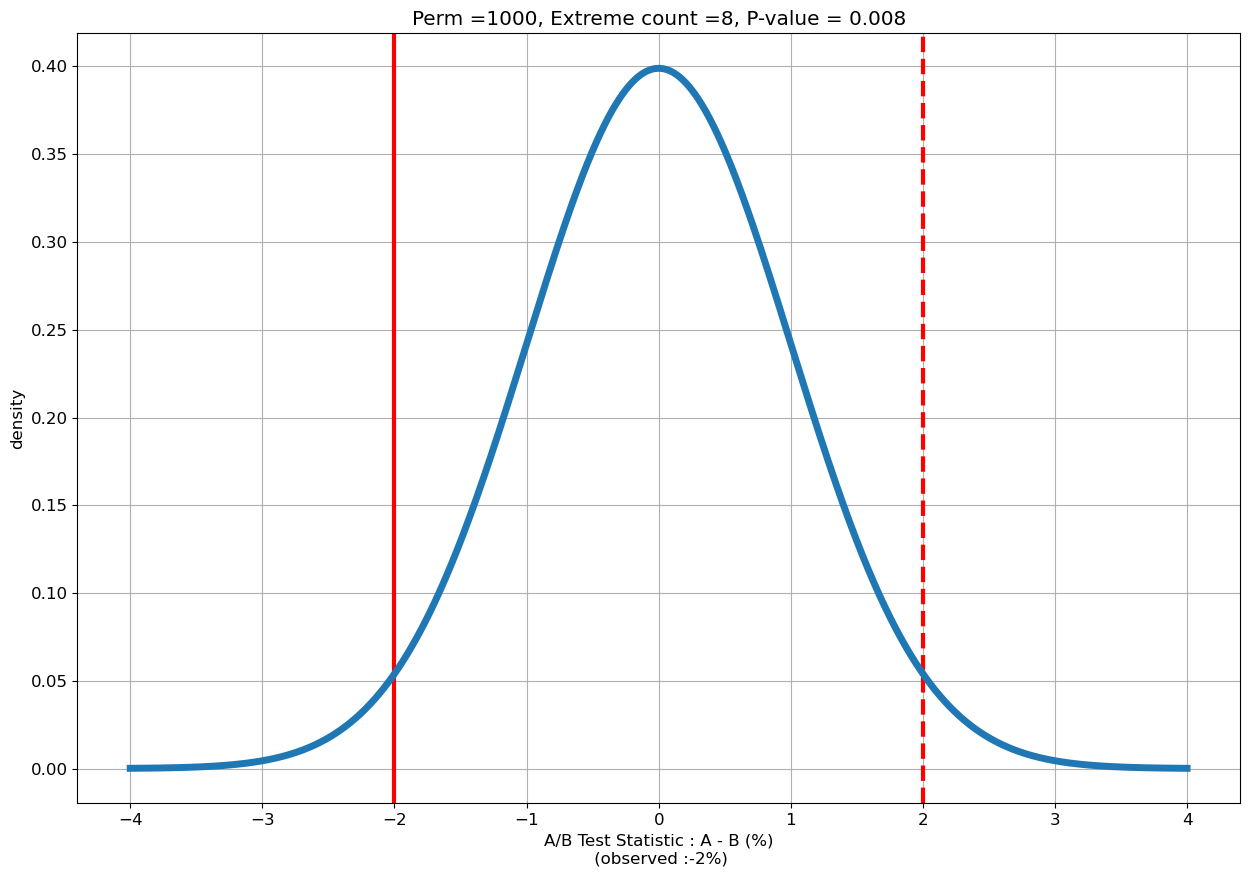

In [50]:
ab_permutation_test(p, a_all, b_all, a_yes, b_yes, n_p)